In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import seaborn as sns

In [2]:
new_cars = pd.read_csv('used_car_prices.csv')
used_cars = pd.read_csv('new_cars_prices.csv')

### new_cars

In [3]:
display(new_cars, new_cars.dtypes, new_cars.describe(), new_cars.isna().sum())

,web-scraper-order,Car Model,Month/Year,Average price,Minimum price,Maximum price
0,1680204632-1,Skoda Octavia A8 2022,2023-03,"967,000 EGP","926,000 EGP","1,017,000 EGP"
1,1680204632-2,Skoda Octavia A8 2022,2023-02,"979,000 EGP","931,000 EGP","1,045,000 EGP"
2,1680204632-3,Skoda Octavia A8 2022,2023-01,"917,000 EGP","893,000 EGP","950,000 EGP"
3,1680204632-4,Skoda Octavia A8 2022,2022-12,"881,000 EGP","793,000 EGP","950,000 EGP"
4,1680204632-5,Skoda Octavia A8 2022,2022-11,"868,000 EGP","789,000 EGP","950,000 EGP"
...,...,...,...,...,...,...
79085,1680204632-79086,Lada 2107 1991,2018-08,"30,000 EGP","26,000 EGP","33,000 EGP"
79086,1680204632-79087,Lada 2107 1991,2018-07,"33,000 EGP","32,000 EGP","35,000 EGP"
79087,1680204632-79088,Lada 2107 1991,2018-01,"28,000 EGP","25,000 EGP","30,000 EGP"
79088,1680204632-79089,Lada 2107 1991,2017-12,"27,000 EGP","25,000 EGP","28,000 EGP"


web-scraper-order    object
Car Model            object
Month/Year           object
Average price        object
Minimum price        object
Maximum price        object
dtype: object

,web-scraper-order,Car Model,Month/Year,Average price,Minimum price,Maximum price
count,79090,79090,78612,78612,78612,78612
unique,79090,1908,128,1397,893,916
top,1680204632-1,Hyundai Excel 1996,2022-11,"76,000 EGP","71,000 EGP","81,000 EGP"
freq,1,128,1480,593,1345,1260


web-scraper-order      0
Car Model              0
Month/Year           478
Average price        478
Minimum price        478
Maximum price        478
dtype: int64

**Имена столбцов дополним названием валюты. В то же время уберем название валюты из самих данных в соответствующих столбцах. Изменим тип данных в соответствующих столбцах. Изменим название столбцов для удобной работы**

In [4]:
new_cars.columns = [col.lower().replace(' ','_') for col in new_cars.columns] 
new_cars.columns = [col.replace('-','_') for col in new_cars.columns] 
new_cars.rename(columns={'average_price': 'average_price_EGP', 
                   'minimum_price': 'minimum_price_EGP', 
                   'maximum_price': 'maximum_price_EGP'}, inplace=True)

In [5]:
replace_dict = {' EGP': '', ',': ''}
new_cars['average_price_EGP'] = new_cars['average_price_EGP'].replace(replace_dict, regex=True).astype('float')
new_cars['minimum_price_EGP'] = new_cars['minimum_price_EGP'].replace(replace_dict, regex=True).astype('float')
new_cars['maximum_price_EGP'] = new_cars['maximum_price_EGP'].replace(replace_dict, regex=True).astype('float')
new_cars['month/year'] = pd.to_datetime(new_cars['month/year'])
display(new_cars, new_cars.dtypes, new_cars.describe(), new_cars['month/year'].agg(['min', 'max']))

,web_scraper_order,car_model,month/year,average_price_EGP,minimum_price_EGP,maximum_price_EGP
0,1680204632-1,Skoda Octavia A8 2022,2023-03-01,967000.0,926000.0,1017000.0
1,1680204632-2,Skoda Octavia A8 2022,2023-02-01,979000.0,931000.0,1045000.0
2,1680204632-3,Skoda Octavia A8 2022,2023-01-01,917000.0,893000.0,950000.0
3,1680204632-4,Skoda Octavia A8 2022,2022-12-01,881000.0,793000.0,950000.0
4,1680204632-5,Skoda Octavia A8 2022,2022-11-01,868000.0,789000.0,950000.0
...,...,...,...,...,...,...
79085,1680204632-79086,Lada 2107 1991,2018-08-01,30000.0,26000.0,33000.0
79086,1680204632-79087,Lada 2107 1991,2018-07-01,33000.0,32000.0,35000.0
79087,1680204632-79088,Lada 2107 1991,2018-01-01,28000.0,25000.0,30000.0
79088,1680204632-79089,Lada 2107 1991,2017-12-01,27000.0,25000.0,28000.0


web_scraper_order            object
car_model                    object
month/year           datetime64[ns]
average_price_EGP           float64
minimum_price_EGP           float64
maximum_price_EGP           float64
dtype: object

,average_price_EGP,minimum_price_EGP,maximum_price_EGP
count,7.861200e+04,7.861200e+04,7.861200e+04
mean,1.789404e+05,1.684735e+05,1.894457e+05
std,1.872136e+05,1.775549e+05,1.974310e+05
min,1.600000e+04,4.000000e+03,1.800000e+04
25%,7.400000e+04,6.900000e+04,7.900000e+04
50%,1.240000e+05,1.170000e+05,1.310000e+05
75%,2.140000e+05,2.000000e+05,2.250000e+05
max,3.618000e+06,3.468000e+06,3.800000e+06


min   2012-01-01
max   2023-03-01
Name: month/year, dtype: datetime64[ns]

**Оставим только нужные данные. Создадим новый столбец с состоянием машины (для того чтобы отличать данные после дальнейшей конкатенации)**

In [6]:
new_cars = new_cars[['car_model', 'month/year', 'average_price_EGP']]
new_cars['condition'] = 'new'
new_cars.rename(columns={'month/year': 'date', 'average_price_EGP': 'price_EGP'}, inplace=True)

### used_cars

In [7]:
display(used_cars, used_cars.dtypes, used_cars.describe())

,web-scraper-order,Car Model,Old Price,Price Change,New Price,date_range
0,1680210890-1,Porsche Cayenne A/T / Coupe 2020,"2,262,876\nEGP","trending_down\n-82,876\nEGP","2,180,000\nEGP",18/11/2020
1,1680210890-2,Porsche Cayenne A/T / Coupe 2020,"2,078,727\nEGP","trending_up\n+184,149\nEGP","2,262,876\nEGP",14/10/2019
2,1680210890-3,Porsche Cayenne A/T / S 2020,"2,388,000\nEGP","trending_down\n-93,000\nEGP","2,295,000\nEGP",18/11/2020
3,1680210890-4,Porsche Cayenne A/T / S 2020,"2,262,876\nEGP","trending_up\n+125,124\nEGP","2,388,000\nEGP",15/10/2019
4,1680210890-5,Lexus LX 570 Automtic 2020,"5,600,000\nEGP","trending_down\n-350,000\nEGP","5,250,000\nEGP",18/05/2020
...,...,...,...,...,...,...
3428,1680210890-3429,Citroën C5 Aircross A/T / FEEL / with out sunr...,"779,900\nEGP","trending_up\n+35,000\nEGP","814,900\nEGP",30/11/2022
3429,1680210890-3430,Citroën C5 Aircross A/T / SHINE 2023,"1,149,000\nEGP","trending_up\n+170,000\nEGP","1,319,000\nEGP",27/03/2023
3430,1680210890-3431,Citroën C5 Aircross A/T / SHINE 2023,"1,070,000\nEGP","trending_up\n+79,000\nEGP","1,149,000\nEGP",01/02/2023
3431,1680210890-3432,Citroën C5 Aircross A/T / SHINE 2023,"899,900\nEGP","trending_up\n+170,100\nEGP","1,070,000\nEGP",10/01/2023


web-scraper-order    object
Car Model            object
Old Price            object
Price Change         object
New Price            object
date_range           object
dtype: object

,web-scraper-order,Car Model,Old Price,Price Change,New Price,date_range
count,3433,3433,3433,3433,3433,3433
unique,3433,644,1131,445,1170,268
top,1680210890-1,Chery Tiggo 7 pro A/T / Luxury 2022,"445,000\nEGP","trending_up\n+10,000\nEGP","445,000\nEGP",15/01/2023
freq,1,10,23,293,24,79


**Проделаем те же шаги**

In [8]:
used_cars.columns = [col.lower().replace(' ','_') for col in used_cars.columns] 
used_cars.columns = [col.replace('-','_') for col in used_cars.columns] 
used_cars.rename(columns={'old_price': 'old_price_EGP', 
                   'new_price': 'new_price_EGP'}, inplace=True)

In [9]:
used_cars['old_price_EGP'] = used_cars['old_price_EGP'].str.split('\n').str[0]
used_cars['old_price_EGP'] = used_cars['old_price_EGP'].str.replace(',', '').astype('float')
used_cars['new_price_EGP'] = used_cars['new_price_EGP'].str.split('\n').str[0]
used_cars['new_price_EGP'] = used_cars['new_price_EGP'].str.replace(',', '').astype('float')

used_cars['date_range'] = pd.to_datetime(used_cars['date_range']) + pd.offsets.MonthBegin(0) # приведем даты к началу месяца

display(used_cars, used_cars.dtypes, used_cars.describe(), used_cars['date_range'].agg(['min', 'max']))

,web_scraper_order,car_model,old_price_EGP,price_change,new_price_EGP,date_range
0,1680210890-1,Porsche Cayenne A/T / Coupe 2020,2262876.0,"trending_down\n-82,876\nEGP",2180000.0,2020-12-01
1,1680210890-2,Porsche Cayenne A/T / Coupe 2020,2078727.0,"trending_up\n+184,149\nEGP",2262876.0,2019-11-01
2,1680210890-3,Porsche Cayenne A/T / S 2020,2388000.0,"trending_down\n-93,000\nEGP",2295000.0,2020-12-01
3,1680210890-4,Porsche Cayenne A/T / S 2020,2262876.0,"trending_up\n+125,124\nEGP",2388000.0,2019-11-01
4,1680210890-5,Lexus LX 570 Automtic 2020,5600000.0,"trending_down\n-350,000\nEGP",5250000.0,2020-06-01
...,...,...,...,...,...,...
3428,1680210890-3429,Citroën C5 Aircross A/T / FEEL / with out sunr...,779900.0,"trending_up\n+35,000\nEGP",814900.0,2022-12-01
3429,1680210890-3430,Citroën C5 Aircross A/T / SHINE 2023,1149000.0,"trending_up\n+170,000\nEGP",1319000.0,2023-04-01
3430,1680210890-3431,Citroën C5 Aircross A/T / SHINE 2023,1070000.0,"trending_up\n+79,000\nEGP",1149000.0,2023-02-01
3431,1680210890-3432,Citroën C5 Aircross A/T / SHINE 2023,899900.0,"trending_up\n+170,100\nEGP",1070000.0,2023-10-01


web_scraper_order            object
car_model                    object
old_price_EGP               float64
price_change                 object
new_price_EGP               float64
date_range           datetime64[ns]
dtype: object

,old_price_EGP,new_price_EGP
count,3.433000e+03,3.433000e+03
mean,6.625076e+05,7.256506e+05
std,6.742132e+05,7.706280e+05
min,2.800000e+04,3.550000e+04
25%,3.650000e+05,3.850000e+05
50%,4.890000e+05,5.249000e+05
75%,6.999900e+05,7.600000e+05
max,7.630000e+06,1.300000e+07


min   2019-11-01
max   2024-01-01
Name: date_range, dtype: datetime64[ns]

**Оставим только нужные данные. Создадим новый столбец с состоянием машины**

In [10]:
used_cars = used_cars[['car_model', 'date_range', 'new_price_EGP']]
used_cars['condition'] = 'used'
used_cars.rename(columns={'date_range': 'date', 'new_price_EGP': 'price_EGP'}, inplace=True)

**Сконкатенируем датафреймы**

In [11]:
concatenated_df = pd.concat([new_cars, used_cars], ignore_index=True)
concatenated_df.sort_values(by='date', inplace=True)

In [12]:
min_date = '2019-11-01'
max_date = '2024-01-01'
concatenated_df = concatenated_df.query('@min_date <= date <= @max_date ')
concatenated_df['rolling_price'] = concatenated_df['price_EGP'].rolling(7).mean()

In [13]:
concatenated_df.query('condition == "used"')['date'].agg(['min', 'max'])

concatenated_df['date'] = pd.to_numeric(pd.to_datetime(concatenated_df['date']))

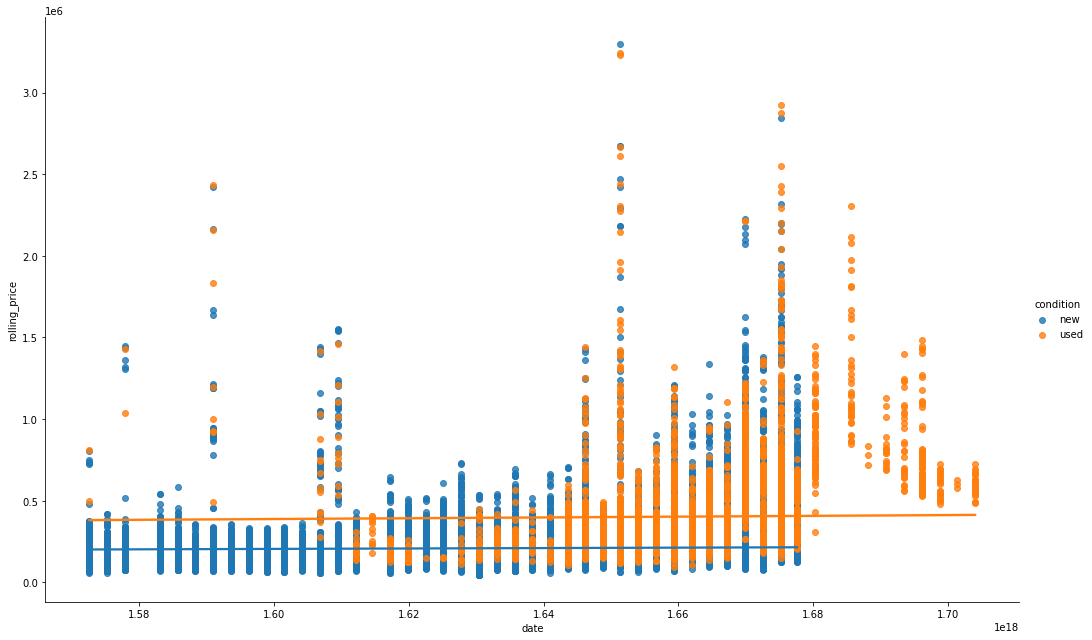

In [14]:
sns.lmplot(x='date', y='rolling_price', hue='condition', data=concatenated_df,
                     height=9, aspect=1.6, robust=True, palette='tab10')

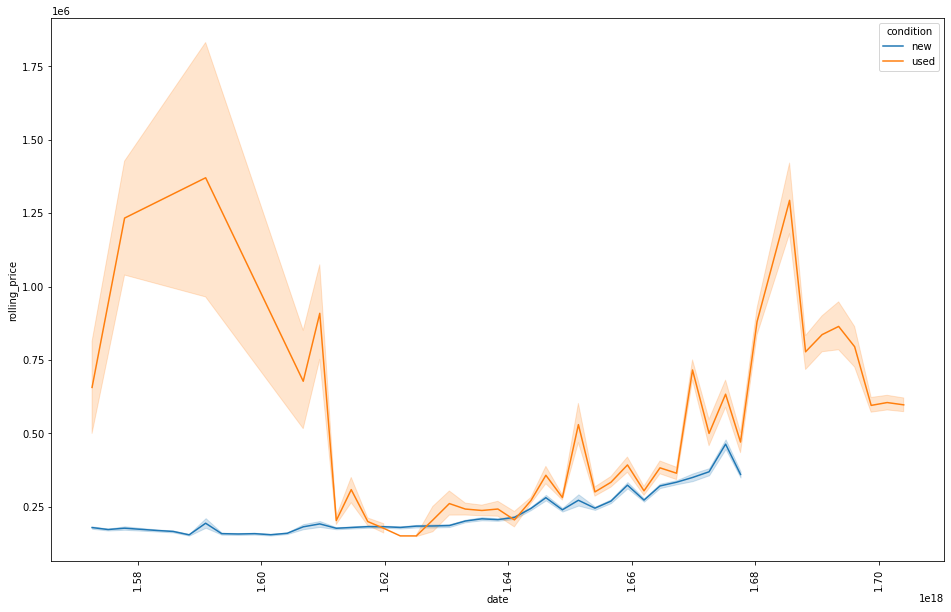

In [15]:
plt.rcParams['figure.figsize'] = (16,10)

sns.lineplot(data=concatenated_df, x='date', y='rolling_price', hue='condition')
plt.xticks(rotation=90);